In [21]:
library("igraph")
library('Matrix')
library('pracma')

ERROR: Error in library("pracma"): there is no package called ‘pracma’


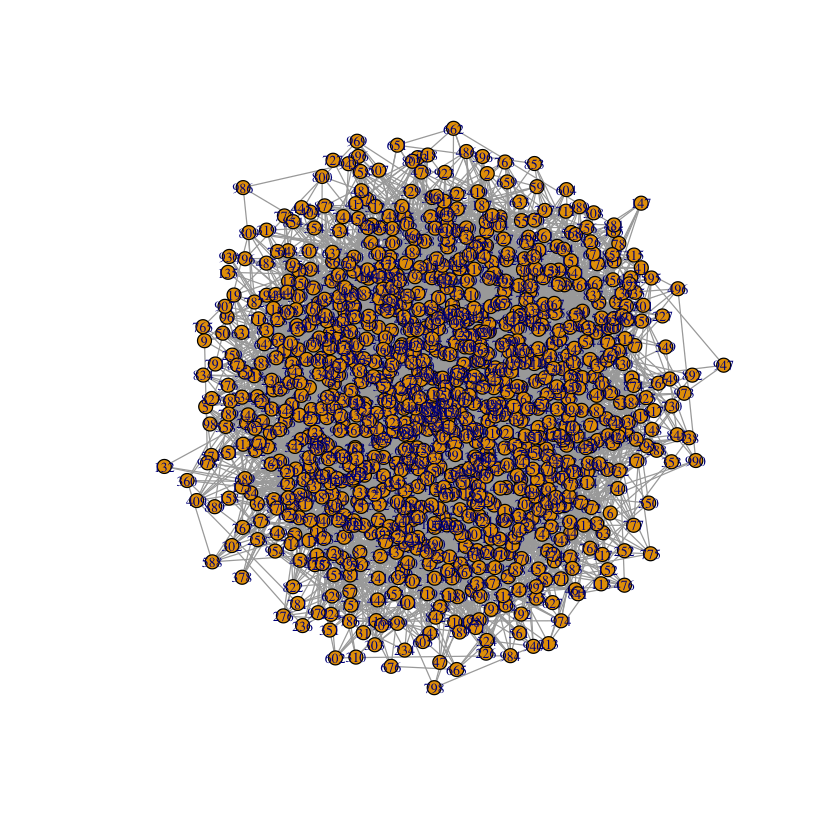

In [5]:
#2.1(a)
g= erdos.renyi.game(n=1000,p=0.01,directed=FALSE)
plot(g,vertex.size=5, vertex.label.cex=0.7)

In [20]:

create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

start_node = 10
l = c()
s_t.mean = c()
s_t.sd = c()
node_degree = c()

for (steps in 1:100) {
    v_last = random_walk(g, steps, start_node)
    shortpath = shortest.paths(g, start_node, v_last)
    l <- c(l, shortpath)
    s_t.mean <- c(s_t.mean, mean(l))
    s_t.sd <- c(s_t.sd, sd(l))
    node_degree <- c(node_degree, degree(g, v_last))
}
print(mean(s_t.mean))
print(mean(s_t.std))


layout(matrix(c(1,2,3,4), 2, 2, byrow = TRUE))
plot(s_t.mean, main="the avg distance vs step",xlab="step",ylab="avg distance")
plot(s_t.sd, main="the std of the distance vs step",xlab="step",ylab="std")
plot(node_degree, main="node degree vs graph degree",xlab="step",ylab="degree")
par(degree.distribution(g1)[1:100], new=TRUE)
    

ERROR: Error in rowSums(adj): 'x' must be an array of at least two dimensions
